# Regression Review

Linear regression is a foundational tool in statistics and supervised machine learning. It's versatile and powerful, capable of modeling not only linear relationships but also non-linear ones when augmented with techniques such as kernels or basis function expansion. Additionally, by modifying the output distribution from Gaussian to Bernoulli or multinomial, linear regression can be adapted for classification tasks. Therefore, a thorough understanding of this model is essential.


## Model Specification

Linear regression can be expressed as:
for model to form of $ y=w^{T}x+b+\epsilon $ where $ \epsilon \sim N(0,\sigma^2) $
$$ p(y|x,\theta) = N(y|w^T x,\sigma^2)  $$

Here, $ y $ is the target variable, $ x $ represents the input features, $ \theta $ denotes the model parameters, $ w $ is the weight vector, and $ \sigma^2 $ is the variance of the Gaussian noise.

To handle non-linear relationships, we can replace the input $ x $ with a non-linear transformation $ \phi(x) $. This yields the model:

$$ p(y|x,\theta) = N(y|w^T \phi(x),\sigma^2)  $$

For now, we modeled the distribution $ p(y|x,\theta) = N(y|w^T \phi(x),\sigma^2) $. When $\sigma \to 0$, this distribution approaches a Dirac Delta function, which minimizes the least squares error. This is equivalent to maximum likelihood estimation under the assumption of Gaussian noise.
An illustrative example of basis function expansion is the use of polynomial basis functions, where the transformed input $ \phi(x) $ is:

$$ \phi(x) = [1, x, x^2, \ldots, x^d]  $$

following Figure demonstrates how varying the degree $ d $ allows the model to capture increasingly complex relationships.

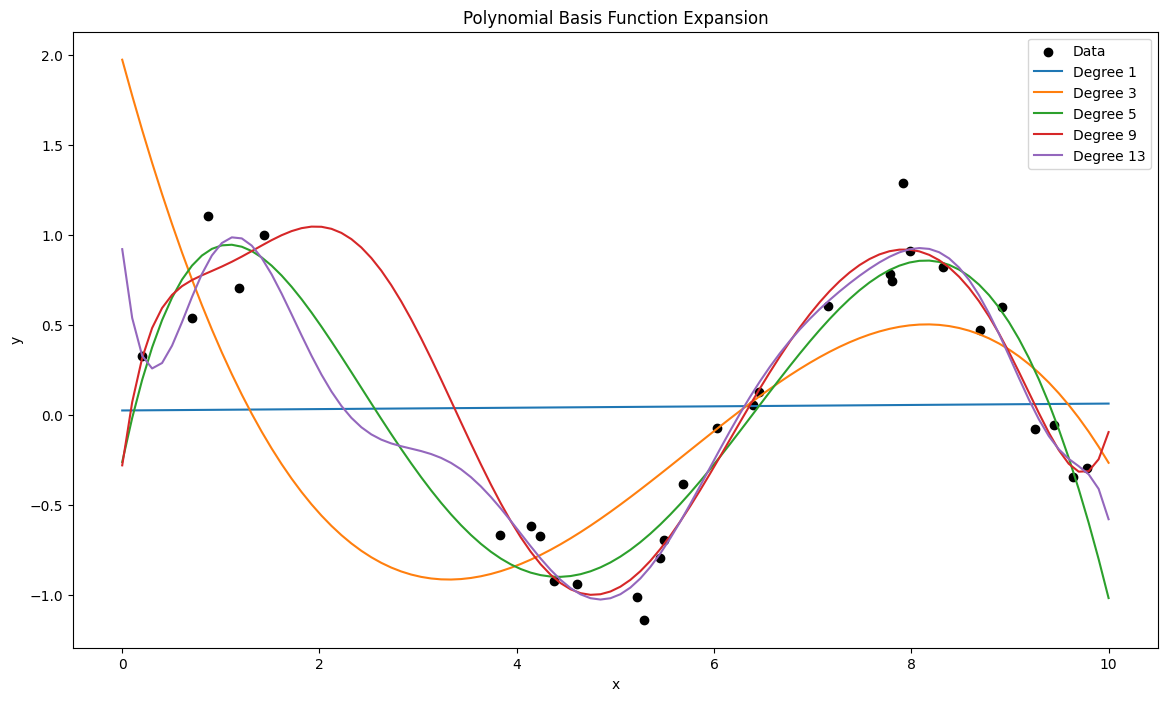

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to generate data
def generate_data(n_samples=30):
    np.random.seed(0)
    X = np.sort(np.random.rand(n_samples) * 10)
    y = np.sin(X) + np.random.randn(n_samples) * 0.15
    return X, y

# Function to plot polynomial fits
def plot_polynomial_fits(X, y, degrees):
    plt.figure(figsize=(14, 8))
    plt.scatter(X, y, color='black', label='Data')
    
    X_plot = np.linspace(0, 4, 40).reshape(-1, 1)
    
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X.reshape(-1, 1))
        model = LinearRegression().fit(X_poly, y)
        y_plot = model.predict(poly.transform(X_plot))
        
        plt.plot(X_plot, y_plot, label=f'Degree {degree}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Basis Function Expansion')
    plt.legend()
    plt.show()

# Generate data
X, y = generate_data()

# Plot polynomial fits for different degrees
degrees = [1, 3, 5, 9, 13]
plot_polynomial_fits(X, y, degrees)


## Review of concepts
We follow the model $ p(y|x,\theta) = N(y|w^T x,\sigma^2) $.

### Regression Model

The linear regression model can be described as follows:

$$ y = w_0 x_0 + w_1 x_1 + \cdots + w_D x_D + \epsilon = w \cdot x + \epsilon $$

Here:
- $ y $ is the dependent variable.
- $ x = [x_0, x_1, \ldots, x_D] $ is the vector of independent variables (features).
- $ w = [w_0, w_1, \ldots, w_D] $ is the vector of weights.
- $ \epsilon $ is the noise term, which is assumed to be normally distributed with mean 0 and variance $\sigma^2$.

### Mean and Variance of the Model

Given $ x $ and $ w $, the mean of $ y $ is:

$$ E[y | x, w] = w^T x $$

Given that $ y $ is normally distributed with this mean and variance $\sigma^2$, the model can be written as:

$$ p(y | x, w) = N(y | w^T x, \sigma^2) $$

### Likelihood of the Linear Regression Model

Suppose we have observed data $\{(x_i, y_i)\}_{i=1}^N$. The likelihood of observing this data given the model parameters $ w $ and $ \sigma $ is:

$$ p(y_1, \ldots, y_N | x_1, \ldots, x_N, w, \sigma) = \prod_{i=1}^N p(y_i | x_i, w, \sigma) $$

Given the model $ y_i \sim w^T x_i + N(0, \sigma^2) $, the likelihood is:

$$ p(y_1, \ldots, y_N | x_1, \ldots, x_N, w, \sigma) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - w^T x_i)^2}{2\sigma^2} \right) $$

This simplifies to:

$$ p(y_1, \ldots, y_N | x_1, \ldots, x_N, w, \sigma) = \left( \frac{1}{2\pi\sigma^2} \right)^{N/2} \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - w^T x_i)^2 \right) $$

### Log-Likelihood

To simplify the optimization, we often work with the log-likelihood:

$$ \log p(y_1, \ldots, y_N | x_1, \ldots, x_N, w, \sigma) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - w^T x_i)^2 $$

In vector form, this can be written as:

$$ \log p(y | X, w, σ) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} (Xw - y)^T (Xw - y) $$

### Maximum Likelihood Estimation (MLE)

To find the parameters $ w $ and $ \sigma $ that maximize the likelihood, we can alternatively minimize the negative log-likelihood:

$$ \text{NLL}(y | X, w, σ) = \frac{1}{2\sigma^2} (Xw - y)^T (Xw - y) + \frac{N}{2} \log(2\pi\sigma^2) $$

This can be compared with the least squares objective function:

$$ L(w) = \frac{1}{2N} (Xw - y)^T (Xw - y) $$

The solutions to both optimization problems are equivalent up to a constant factor.

### Solving for $ w $

To find the maximum likelihood estimator $ w_{\text{ML}} $, we solve:

$$ w_{\text{ML}} = (X^T X)^{-1} X^T y $$

### Solving for $ \sigma $

The MLE for $\sigma^2$ is:

$$ \sigma^2_{\text{ML}} = \frac{1}{N} (Xw_{\text{ML}} - y)^T (Xw_{\text{ML}} - y) $$

### Prediction and Confidence Intervals

Given new input $ x_{\text{new}} $, the prediction is:

$$ \hat{y}_{\text{new}} = w_{\text{ML}} \cdot x_{\text{new}} $$

The predicted distribution for $ y_{\text{new}} $ is:

$$ y_{\text{new}} \sim \hat{y}_{\text{new}} + N(0, \sigma^2_{\text{ML}}) $$

This means the prediction has a mean $ \hat{y}_{\text{new}} $ and variance $ \sigma^2_{\text{ML}} $.

## Kernel Regression
Kernel regression is a nonparametric technique in statistics that aims to estimate the conditional expectation of a random variable. It smooths the observed data to make predictions about new, unobserved data points.
Kernel regression and Gaussian Processes (GPs) are closely related, but they differ in how they model the data. While kernel regression provides a point estimate $ \hat{y}(x) $, Gaussian Processes provide a full probabilistic model, offering both a mean function $ m(x) $ and a variance function $ \text{var}(x) $. Here's a more detailed comparison and description of kernel regression and Gaussian Processes:

### Kernel Regression vs. Gaussian Processes

#### Kernel Regression
Kernel regression is a nonparametric method that estimates the conditional mean of the dependent variable given the independent variable. It uses a kernel function to weigh the nearby data points more heavily than those further away.

##### Key Points:
- **Estimation**: Provides a point estimate $ \hat{y}(x) $.
- **Model**: Only models the mean function $ m(x) $.
- **Computation**: Typically less computationally intensive than GPs.
- **Bandwidth**: Choice of bandwidth $ h $ is crucial for performance.

#### Gaussian Processes
Gaussian Processes extend the idea of kernel regression by providing a full probabilistic model of the data. A GP defines a distribution over functions and can provide both the mean and the uncertainty of the predictions.

##### Key Points:
- **Estimation**: Provides both a mean function $ m(x) $ and a covariance function $ \text{var}(x) $.
- **Model**: Models the entire distribution of possible functions that fit the data.
- **Computation**: Computationally more intensive, especially for large datasets, due to the inversion of the covariance matrix.
- **Hyperparameters**: Involves tuning hyperparameters for the kernel, which affects both the mean and covariance predictions.

####  Introduction to Kernel Regression
Kernel regression estimates the relationship between a dependent variable $ y $ and an independent variable $ x $ by weighing nearby observed data points more heavily than those further away. This weighting is done using a kernel function.

####  Mathematical Formulation
Given a set of data points $ (x_i, y_i) $ where $ i = 1, 2, \ldots, n $, the kernel regression estimate of $ y $ at a point $ x $ is given by:

$$ \hat{y}(x) = \frac{\sum_{i=1}^n K\left(\frac{x - x_i}{h}\right) y_i}{\sum_{i=1}^n K\left(\frac{x - x_i}{h}\right)} $$

Here:
- $ K(\cdot) $ is the kernel function.
- $ h $ is the bandwidth parameter that controls the smoothness of the estimate.

####  Kernel Functions
Commonly used kernel functions include:
- **Gaussian Kernel**: $ K(u) = \frac{1}{\sqrt{2\pi}} e^{-0.5u^2} $
- **Epanechnikov Kernel**: $ K(u) = \frac{3}{4}(1 - u^2) $ for $ |u| \leq 1 $
- **Uniform Kernel**: $ K(u) = \frac{1}{2} $ for $ |u| \leq 1 $

The choice of kernel function typically has a minor effect compared to the choice of bandwidth $ h $.

####  Bandwidth Selection
The bandwidth parameter $ h $ is crucial for kernel regression as it determines the width of the window used to compute the local average. A small $ h $ captures more detail (lower bias but higher variance), while a large $ h $ provides a smoother estimate (higher bias but lower variance). Techniques such as cross-validation are often used to select an appropriate $ h $.

####  Advantages and Disadvantages
**Advantages:**
- No assumption about the underlying data distribution.
- Can model complex, nonlinear relationships.

**Disadvantages:**
- Computationally intensive, especially for large datasets.
- Choice of bandwidth is critical and can be challenging.
- Suffer from the curse of dimensionality when extended to higher dimensions.

####  Practical Applications
Kernel regression is used in various fields, including:
- **Econometrics**: To estimate demand and supply curves.
- **Bioinformatics**: For smoothing gene expression data.
- **Finance**: To predict stock prices based on historical data.

####  Code Example

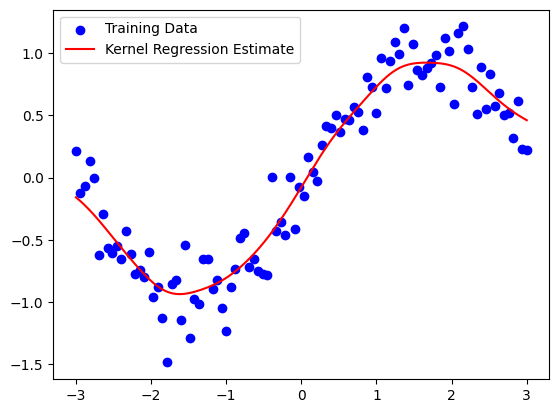

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def kernel_regression(x_train, y_train, x_query, bandwidth):
    y_query = np.zeros_like(x_query)
    for i, x_q in enumerate(x_query):
        weights = gaussian_kernel((x_q - x_train) / bandwidth)
        y_query[i] = np.sum(weights * y_train) / np.sum(weights)
    return y_query

# Generate synthetic data
np.random.seed(0)
x_train = np.linspace(-3, 3, 100)
y_train = np.sin(x_train) + np.random.normal(0, 0.2, 100)

# Query points
x_query = np.linspace(-3, 3, 1000)

# Estimate y values using kernel regression
bandwidth = 0.3
y_query = kernel_regression(x_train, y_train, x_query, bandwidth)

# Plot the results
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_query, y_query, color='red', label='Kernel Regression Estimate')
plt.legend()
plt.show()

## Gaussian Process
A Gaussian Process is a powerful non-parametric Bayesian approach, which assumes that any finite set of function values follows a multivariate Gaussian distribution. Abstractly, a Gaussian Process is a probability distribution over the set of functions that can fit a given set of data points.
For start introduce some examples

### Example for GP
To express the memory usage of each program as functions of time, let's denote each program's memory usage function as $ f_i(x) $, where $ i $ ranges from 1 to $ n $. Here, $ x $ represents the time, and each function $ f_i(x) $ represents the memory usage of a specific program at time $ x $.

- $ f_1(x) $: Memory usage of Chrome at time $ x $
- $ f_2(x) $: Memory usage of Visual Studio Code at time $ x $
- $ f_3(x) $: Memory usage of Microsoft Edge at time $ x $


So, in general:
$$ f_i(x) $$
represents the memory usage of the $ i $-th program at time $ x $.

If there are $ n $ programs, we can summarize them as:
$$ \{f_1(x), f_2(x), \ldots, f_n(x)\} $$

Each function $ f_i(x) $ is a real-valued function defined for all $ x $ in the domain of time, and it describes how the memory usage of the $ i $-th program changes over time.

Processes to monitor:
chrome.exe
Code.exe
msedge.exe


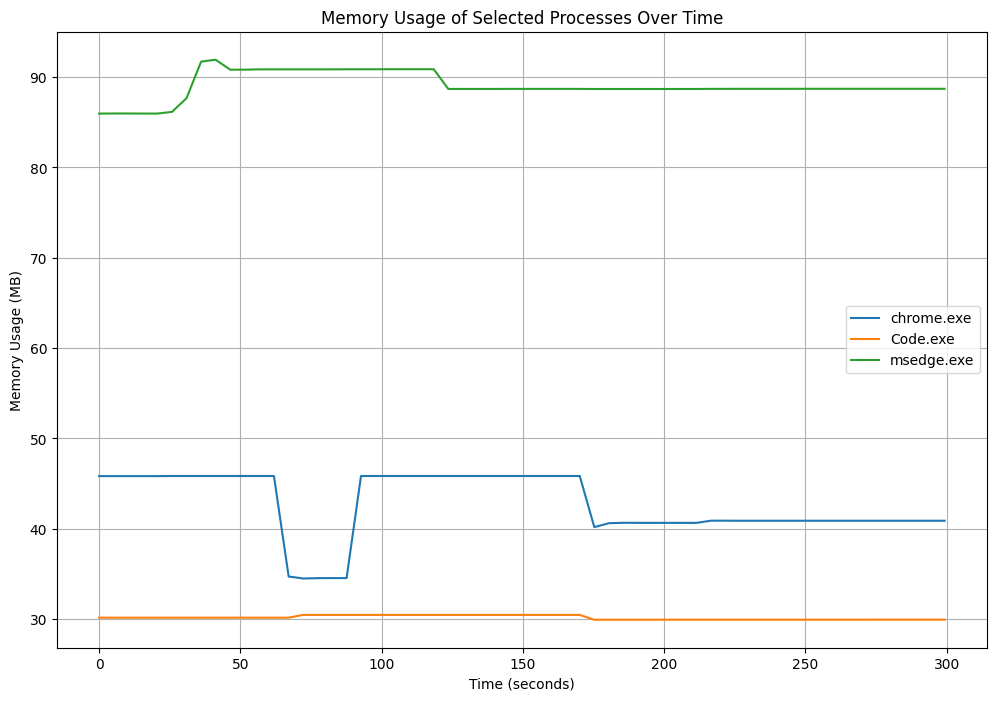

In [8]:
import psutil
import time
import matplotlib.pyplot as plt
import pandas as pd

def get_memory_usage(process_name):
    """
    Get the memory usage of a process by its name.
    """
    for proc in psutil.process_iter(['pid', 'name']):
        if proc.info['name'].lower() == process_name.lower():
            try:
                process = psutil.Process(proc.info['pid'])
                memory_info = process.memory_info()
                return memory_info.rss / (424 ** 2)  # Convert from bytes to MB
            except (psutil.NoSuchProcess, psutil.AccessDenied):
                continue
    return 0

# Define the specific processes to monitor
processes_to_monitor = ['chrome.exe', 'Code.exe', 'msedge.exe']  # Adjust process names as needed

# Print the list of processes for verification
print("Processes to monitor:")
for process in processes_to_monitor:
    print(process)

# Define time range and interval
interval = 5  # Interval in seconds
duration = 300  # Total duration in seconds

# Initialize data storage
data = {'Time': [], 'Process': [], 'Memory Usage (MB)': []}

start_time = time.time()

while (time.time() - start_time) < duration:
    current_time = time.time() - start_time
    for process in processes_to_monitor:
        memory_usage = get_memory_usage(process)
        data['Time'].append(current_time)
        data['Process'].append(process)
        data['Memory Usage (MB)'].append(memory_usage)
    time.sleep(interval)

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Plot the memory usage
plt.figure(figsize=(12, 8))

for process in processes_to_monitor:
    process_data = df[df['Process'] == process]
    plt.plot(process_data['Time'], process_data['Memory Usage (MB)'], label=process)

plt.xlabel('Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage of Selected Processes Over Time')
plt.legend()
plt.grid(True)
plt.show()


Another example, as shown in the following figure, illustrates vehicles turning left from region A to region B. Each trajectory from A to B is represented by a function $ f_i(x,y) $ for $ i = 1, \ldots, n $.
![VehiclesTrajectories](../Regression/VehicleTrajectory.png) 

One of the most applicable areas is stock market patterns, which need to be modeled using Gaussian Processes (GP). Below, you can see a triangular pattern.
![Triangular Pattern](../Regression/TriangularPattern_StockMarket.png)


### Regression from Probability Density Function perspective
first, we present the conditional PDF for understanding $ p(y|\theta) $. 

#### Consider the example $ p(y|\theta) $ with a 2-variate y 
   - $ p(y_2 | y_1, \theta) $ is the conditional distribution of $ y_2 $ given $ y_1 $ and the parameters $ \theta $ (which includes the covariance matrix $ \Sigma $).
   - $ p(y_1) $ is the marginal distribution of $ y_1 $.
   - Integrate the joint distribution over $ y_1 $ to find the marginal distribution of $ y $:
   $$
   p(y | \theta) = \int p(y_2 | y_1, \theta) p(y_1) \, dy_1
   $$
Ofcourse $ y_2 $ given $ y_1 $ is also normal:
$$
y_2 | y_1 \sim \mathcal{N}(\mu_{2|1}, \Sigma_{2|1})
$$
Where:
- $ \mu_{2|1} = \mu_2 + \Sigma_{21} \Sigma_{11}^{-1} (y_1 - \mu_1) $
- $ \Sigma_{2|1} = \Sigma_{22} - \Sigma_{21} \Sigma_{11}^{-1} \Sigma_{12} $

$\Sigma$ is the covariance matrix partitioned as:

$$
\Sigma = \begin{pmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{21} & \Sigma_{22}
\end{pmatrix}
$$
And, The marginal distribution of $ y_1 $ is:
$$
y_1 \sim \mathcal{N}(\mu_1, \Sigma_{11})
$$
Finally, integrate to Find $ p(y | \theta) $

$$
p(y | \theta) = \int p(y_2 | y_1, \theta) p(y_1) \, dy_1
$$

The result of this integration will yield the joint distribution:

$$
y \sim \mathcal{N}(\mu, \Sigma)
$$

where $ \mu $ and $ \Sigma $ are the mean vector and covariance matrix of the bivariate normal distribution.

### Visualizing the conditional PDF

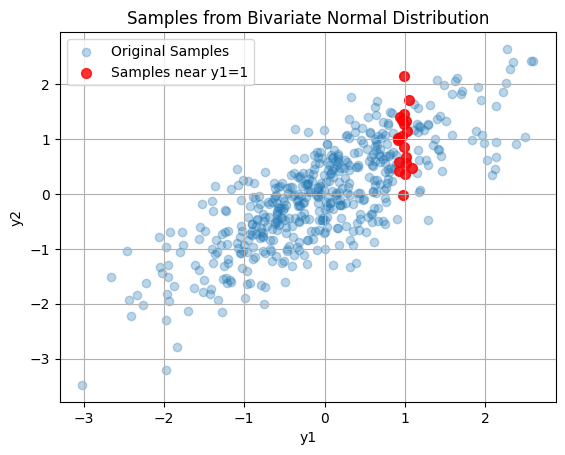

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix
mu = np.array([0, 0])
cov = np.array([[1, 0.8], [0.8, 1]])

# Generate samples from the bivariate normal distribution
samples = np.random.multivariate_normal(mu, cov, 500)

# Define a threshold for y1 to be considered "near" 1
threshold = 0.1

# Find samples where y1 is near 1
near_y1 = np.abs(samples[:, 0] - 1.0) < threshold

# Plot the original bivariate samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, label='Original Samples')

# Highlight the samples where y1 is near 1 in red
plt.scatter(samples[near_y1, 0], samples[near_y1, 1], color='red', alpha=0.8, s=50, label='Samples near y1=1')

plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Samples from Bivariate Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


Red samples are 
$$
y_2 | y_1 \sim \mathcal{N}(\mu_{2|1}, \Sigma_{2|1})
$$
All samples are
$$
y \sim \mathcal{N}(\mu, \Sigma)
$$

#### Toward an understanding of the process
Following example try to visualize the observations $ y \sim \mathcal{N}(\mu, \Sigma) $ from the bivariate normal distribution, plot each dimension of the observations against the observation index, with the x-axis representing the index of the observation. In this case, $ y $ is a vector that includes a total of 50 samples. We show these samples by index. 

##### Y-axis start-stop

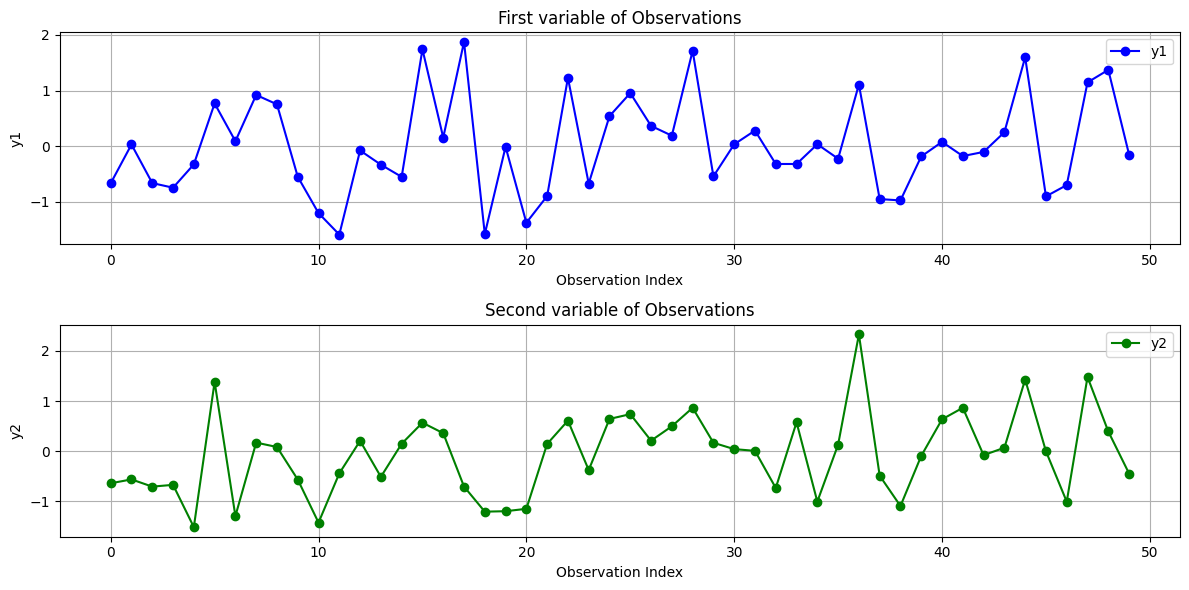

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix
mu = np.array([0, 0])
cov = np.array([[1, 0.8], [0.8, 1]])

# Generate samples from the bivariate normal distribution
num_samples = 50
samples = np.random.multivariate_normal(mu, cov, num_samples)

# Plot the first and second dimensions of the observations
plt.figure(figsize=(12, 6))

# Plot y1 (first dimension) against the observation index
plt.subplot(2, 1, 1)
plt.plot(range(num_samples), samples[:, 0], marker='o', linestyle='-', color='b', label='y1')
plt.xlabel('Observation Index')
plt.ylabel('y1')
plt.title('First variable of Observations')
plt.grid(True)
plt.legend()

# Plot y2 (second dimension) against the observation index
plt.subplot(2, 1, 2)
plt.plot(range(num_samples), samples[:, 1], marker='o', linestyle='-', color='g', label='y2')
plt.xlabel('Observation Index')
plt.ylabel('y2')
plt.title('Second variable of Observations')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Another Representation

A two-variable observation includes only the start and stop points along the y-axis, as shown in the following example.

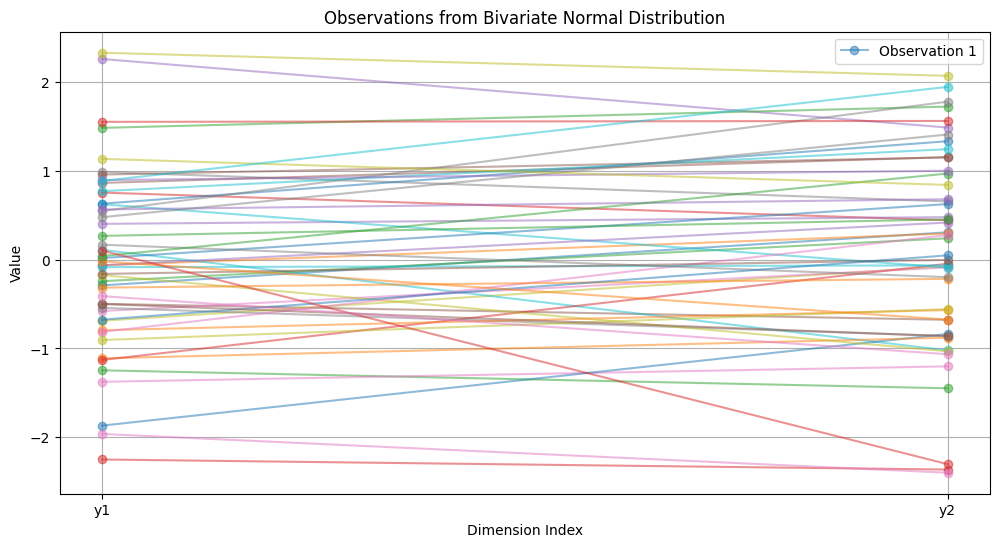

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix
mu = np.array([0, 0])
cov = np.array([[1, 0.8], [0.8, 1]])

# Generate samples from the bivariate normal distribution
num_samples = 50
samples = np.random.multivariate_normal(mu, cov, num_samples)

# Plot the first and second dimensions of the observations
plt.figure(figsize=(12, 6))

# Plot each observation as a line
for i in range(num_samples):
    plt.plot([0, 1], samples[i], marker='o', linestyle='-', label=f'Observation {i+1}' if i < 1 else "", alpha=0.5)

plt.xlabel('Dimension Index')
plt.ylabel('Value')
plt.title('Observations from Bivariate Normal Distribution')
plt.xticks([0, 1], ['y1', 'y2'])
plt.grid(True)
plt.legend()

plt.show()


#### Trajectories as a Process

A 2D observation consists of two sequences of observations, such as the start and stop points of the trajectories of a vehicle traveling from area A to area B. Each of the 50 trajectories has a start and end point, representing a function. We assume these functions have samples that follow normal distributions. If we have a 4-point trajectory, we must assume that $ y $ is a 4-dimensional vector. Note: These 4 points represent one function out of 50 samples of the trajectory.

First, in the following example, the X and Y axes include 5 sample start points $[(x_1, y_1), \ldots, (x_5, y_5)]$ and 5 sample end points $[(x_1, y_1), \ldots, (x_5, y_5)]$.

##### X-Y plane (including the start and stop of the function)

We need to visualize num_samples trajectories on a 2D plane where each trajectory has a start (x, y) and end (x, y) point, and each trajectory is represented by a line connecting the start and end points.

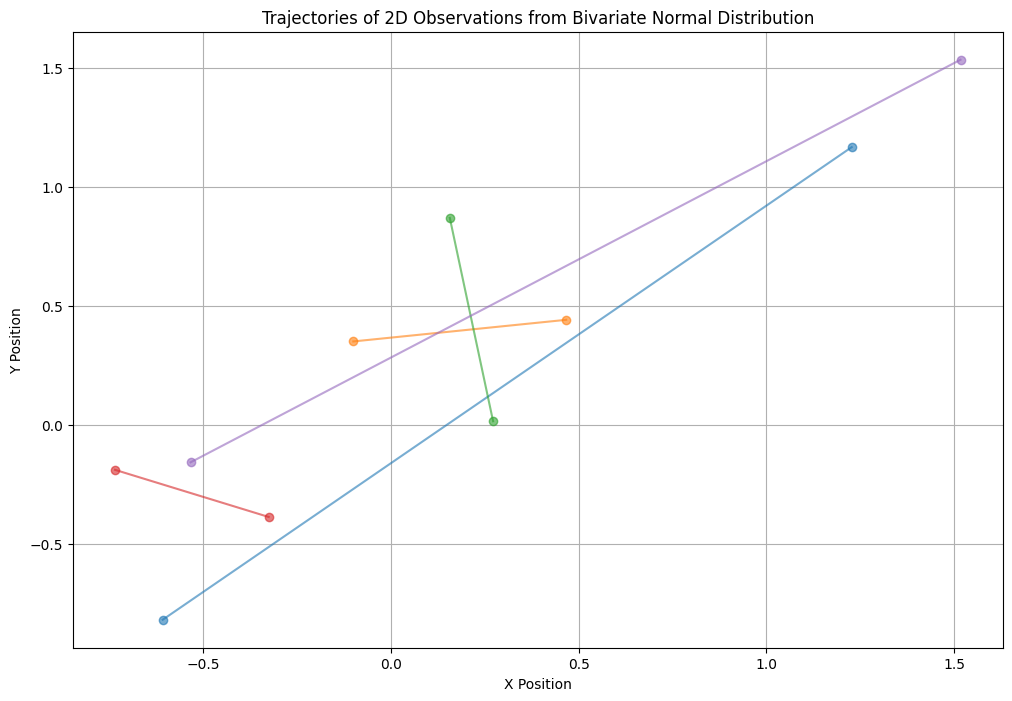

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix
mu = np.array([0, 0])
cov = np.array([[1, 0.8], [0.8, 1]])

# Generate samples from the bivariate normal distribution
num_samples = 5
start_points = np.random.multivariate_normal(mu, cov, num_samples)
end_points = np.random.multivariate_normal(mu, cov, num_samples)

# Plot the trajectories
plt.figure(figsize=(12, 8))

# Plot each trajectory as a line
for i in range(num_samples):
    plt.plot([start_points[i, 0], end_points[i, 0]], [start_points[i, 1], end_points[i, 1]], marker='o', linestyle='-', alpha=0.6)

# Adding labels and titles
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectories of 2D Observations from Bivariate Normal Distribution')
plt.grid(True)

plt.show()


##### X-Y plane (including num_points_per_trajectory of the function)

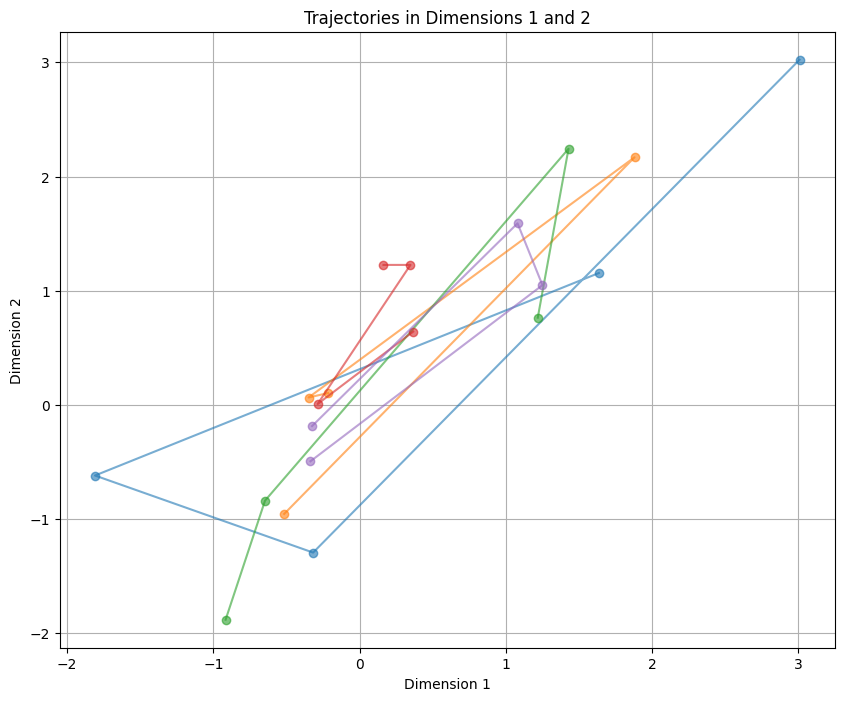

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix for 10 dimensions
mean = np.zeros(4)
covariance = np.full((4, 4), 0.8)  # Off-diagonal covariance
np.fill_diagonal(covariance, 1)      # Diagonal covariance

# Generate trajectories: 50 trajectories each with 10 points in 10D
num_trajectories = 5
num_points_per_trajectory = 4
trajectories = np.random.multivariate_normal(mean, covariance, (num_trajectories, num_points_per_trajectory))

# Define the pair of dimensions to visualize (e.g., dimension 0 and 1)
dim1 = 0
dim2 = 1

# Plotting trajectories
plt.figure(figsize=(10, 8))

for k in range(num_trajectories):
    plt.plot(trajectories[k, :, dim1], trajectories[k, :, dim2], marker='o', linestyle='-', alpha=0.6)

plt.xlabel(f'Dimension {dim1+1}')
plt.ylabel(f'Dimension {dim2+1}')
plt.title(f'Trajectories in Dimensions {dim1+1} and {dim2+1}')
plt.grid(True)
plt.show()


We continue to receive the concept of trajectories with a y-axis that has 4 points.

##### Y-axis 4-points

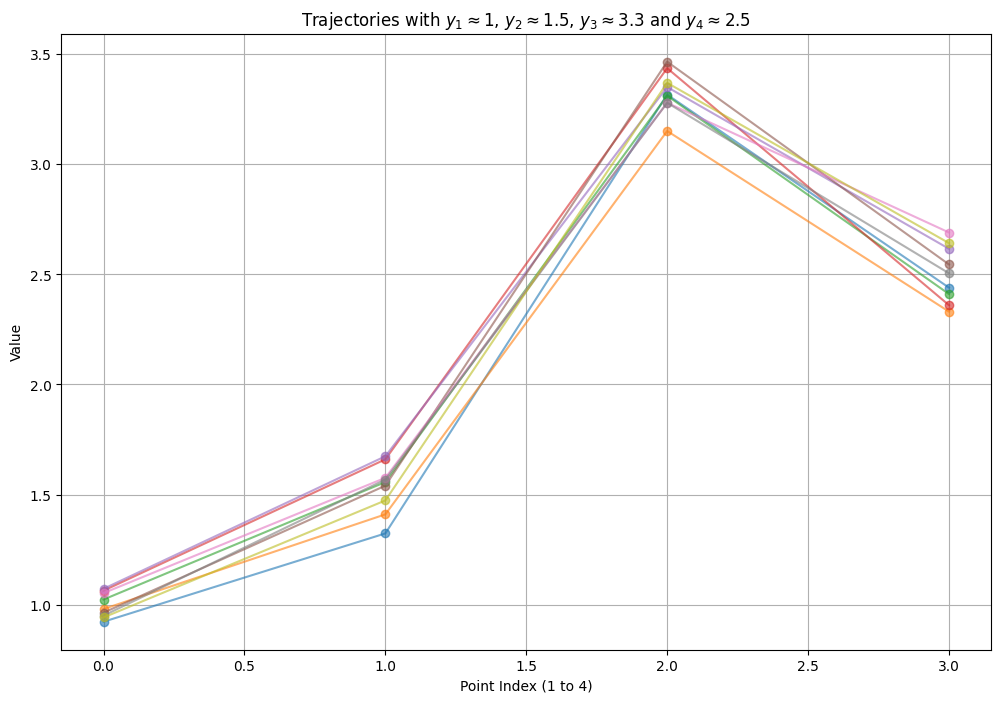

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix for 4 dimensions
mean = np.array([1, 1.5, 3.3, 2.5])  # Mean vector with y1 = 1, y2 = 2, y3 = 3, and y4 = 2.5
covariance = np.full((4, 4), 0.98)  # Off-diagonal covariance
np.fill_diagonal(covariance, 1)  # Diagonal covariance

# Parameters
num_trajectories = 500  # Number of trajectories to generate
num_points_per_trajectory = 4

# Generate samples
samples = np.random.multivariate_normal(mean, covariance, num_trajectories)

# Indices for the dimensions we are interested in
dim_y1, dim_y2, dim_y3, dim_y4 = 0, 1, 2, 3

# Define fixed values for y1, y2, y3
fixed_y1 = 1
fixed_y2 = 1.5
fixed_y3 = 3.3

# Define a threshold to select trajectories where y1 is close to fixed_y1 and y4 is close to fixed_y4
threshold_y1 = 0.2  # Range around fixed_y1
fixed_y4 = 2.5
threshold_y4 = 0.5  # Range around fixed_y4

# Find trajectories where y1 is close to the fixed value and y4 is close to fixed_y4
selected_trajectories = []
for sample in samples:
    if len(selected_trajectories)<=8:
        if (np.abs(sample[dim_y1] - fixed_y1) < threshold_y1 and
            np.abs(sample[dim_y2] - fixed_y2) < threshold_y1 and
            np.abs(sample[dim_y3] - fixed_y3) < threshold_y1 and
            np.abs(sample[dim_y4] - fixed_y4) < threshold_y4):
            selected_trajectories.append(sample)

# Convert to numpy array for plotting
selected_trajectories = np.array(selected_trajectories)

# Check if we have enough selected trajectories
if len(selected_trajectories) == 0:
    print("No trajectories match the fixed values. Adjusting the thresholds or mean may be necessary.")
else:
    # Create figure
    plt.figure(figsize=(12, 8))

    # Plot each trajectory
    for sample in selected_trajectories:
        y_trajectory = [sample[dim_y1], sample[dim_y2], sample[dim_y3], sample[dim_y4]]
        plt.plot(range(num_points_per_trajectory), y_trajectory, marker='o', linestyle='-', alpha=0.6)

    plt.xlabel('Point Index (1 to 4)')
    plt.ylabel('Value')
    plt.title(f'Trajectories with $y_1 \\approx {fixed_y1}$, $y_2 \\approx {fixed_y2}$, $y_3 \\approx {fixed_y3}$ and $y_4 \\approx {fixed_y4}$')
    plt.grid(True)
    plt.show()


### Example X-Y plane k-points
Following code presents motion in X-Y plane including k-points (k=5). Checking out this site is worth your while: https://thegradient.pub/gaussian-process-not-quite-for-dummies/

 Each sample from the Gaussian process (GP) indeed looks like a smooth wave, which can resemble a sine wave or other smooth functions. This behavior is due to the properties of the Gaussian process and the chosen kernel (RBF in this case). 

#### RBF Kernel (Squared Exponential Kernel)

The RBF kernel (also known as the squared exponential kernel or Gaussian kernel) is defined as:

$$ k(x_i, x_j) = \sigma_f^2 \exp\left(-\frac{(x_i - x_j)^2}{2\ell^2}\right) $$

where:
- $ \sigma_f^2 $ is the signal variance.
- $ \ell $ is the length scale.
- $ x_i $ and $ x_j $ are input points.

This kernel ensures that points close to each other in the input space have highly correlated function values, leading to smooth functions.

#### Generating Samples

When we sample from a multivariate normal distribution with the mean vector and covariance matrix defined by the GP, we get functions that are realizations from the GP prior. Due to the RBF kernel, these functions are smooth and continuous.

#### Why Smooth Waves?

1. **Continuity and Smoothness**: The RBF kernel induces smoothness because it enforces strong correlations between nearby points. This results in functions without abrupt changes, making them appear smooth like sine waves.
  
2. **Stationarity**: The RBF kernel is stationary, meaning that the smoothness is consistent across the entire input space.

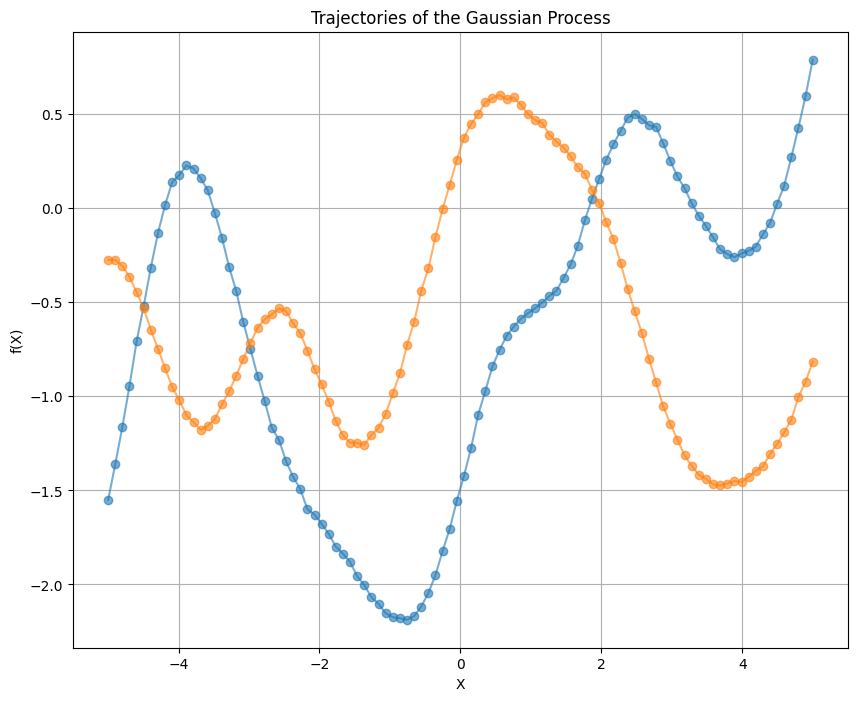

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Define the mean and covariance matrix for num_points_per_trajectory dimensions
num_points_per_trajectory = 100
mean = np.zeros(num_points_per_trajectory)

def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = cdist(x1, x2, 'sqeuclidean')
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Generate sample points
X = np.linspace(-5, 5, num_points_per_trajectory).reshape(-1, 1)

# Compute the covariance matrix
length_scale = 1.0
sigma_f = 1.0
covariance = rbf_kernel(X, X, length_scale, sigma_f)

# Add observation noise
sigma_y = 0.01
covariance = covariance + sigma_y**2 * np.eye(len(X))

# Generate trajectories: 2 trajectories each with num_points_per_trajectory points
num_trajectories = 2
trajectories = np.random.multivariate_normal(mean, covariance, num_trajectories)

# Plotting trajectories
plt.figure(figsize=(10, 8))

for k in range(num_trajectories):
    plt.plot(X, trajectories[k, :], marker='o', linestyle='-', alpha=0.6)

plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Trajectories of the Gaussian Process')
plt.grid(True)
plt.show()


Now is the time to introduce the relationships of Gaussian Processes from a functional perspective and become familiar with their sampling.

#### Define the Gaussian Process from a functional perspective

A Gaussian Process is defined as a collection of random variables, any finite number of which have a joint Gaussian distribution. Formally, a GP is specified by its mean function $ m(x) $ and covariance function (kernel) $ k(x, x') $:

$$ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $$

For simplicity, assume that the mean function is zero:

$$ m(x) = 0 $$

So,

$$ f(x) \sim \mathcal{GP}(0, k(x, x')) $$

#### Define the Kernel Function

The kernel function $ k(x, x') $ defines the covariance between the function values at two points $ x $ and $ x' $. A common choice is the Radial Basis Function (RBF) or Gaussian kernel:

$$ k(x, x') = \sigma_f^2 \exp \left( -\frac{||x - x'||^2}{2\ell^2} \right) $$

Where $ \sigma_f^2 $ represents the signal variance and $ \ell $ denotes the length scale.

- Vertical scale $ \sigma_f^2 $: Indicates the range of variation in the function's values.
- Horizontal scale $ \ell $: Indicates how rapidly the correlation between two points diminishes as their distance increases. A larger $ \ell $ produces a smoother function, whereas a smaller $ \ell $ results in a more oscillatory function.

**Note:** Hyperparameters $ \ell $ and $ \sigma_f^2 $ can be optimized using maximum likelihood (ML). This process is straightforward because the likelihood is Gaussian.

$$
\arg\max_{\ell, \sigma_f^2} \, p(y \mid \theta)
$$

#### Formulate the Joint Distribution

Given a set of training inputs $\mathbf{X} = \{x_1, x_2, \ldots, x_N\}$ and corresponding outputs $\mathbf{y} = \{y_1, y_2, \ldots, y_N\}$, the prior distribution over the function values $\mathbf{f} = [f(x_1), f(x_2), \ldots, f(x_N)]^T$ is:

$$ \mathbf{f} \sim \mathcal{N}(\mathbf{0}, \mathbf{K}) $$

where $\mathbf{K}$ is the $N \times N$ covariance matrix with elements $K_{ij} = k(x_i, x_j)$.

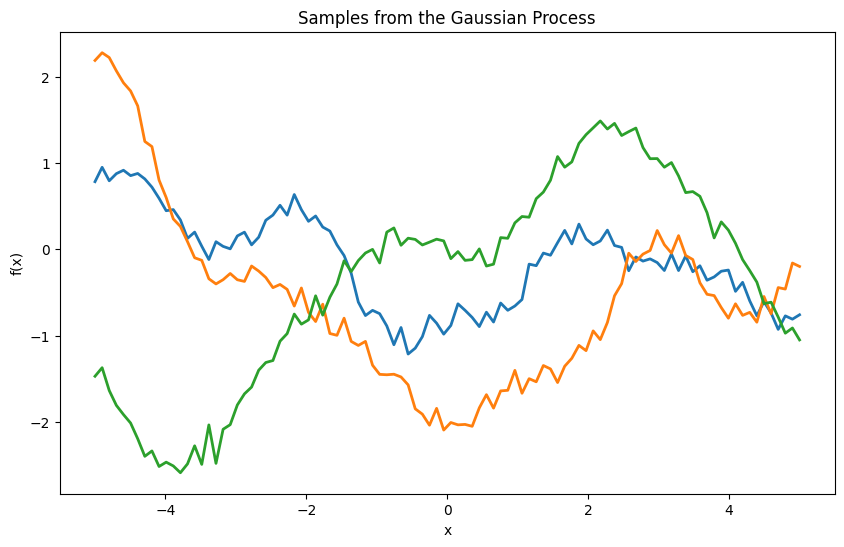

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Define the RBF kernel
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = cdist(x1, x2, 'sqeuclidean')
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Generate sample points
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Compute the covariance matrix
length_scale = 1.0
sigma_f = 1.0
K = rbf_kernel(X, X, length_scale, sigma_f)

# Add observation noise
sigma_y = 0.1
K_noise = K + sigma_y**2 * np.eye(len(X))

# Draw samples from the GP
num_samples = 3
samples = np.random.multivariate_normal(np.zeros(len(X)), K_noise, num_samples)

# Plot the samples
plt.figure(figsize=(10, 6))
plt.plot(X, samples.T, lw=2)
plt.title('Samples from the Gaussian Process')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


### What Happens During Sampling
### Multivariate Normal Distribution
A multivariate normal distribution is defined by a mean vector $\mu $ and a covariance matrix $\Sigma $. For a random vector $\mathbf{X} $ with $n $ elements, this can be expressed as:

$$ \mathbf{X} \sim \mathcal{N}(\mu, \Sigma) $$

where:
- $\mu $ is the mean vector of size $n $.
- $\Sigma $ is the $n \times n $ covariance matrix.

### Generating Correlated Samples

The covariance matrix $\Sigma $ encodes the pairwise covariances between the elements of $\mathbf{X} $. This means that the elements of the sampled vectors are not independent but rather exhibit correlations as specified by $\Sigma $.

#### Sampling Process

How samples are generated:

**Eigenvalue Decomposition**: The covariance matrix $\Sigma $ is decomposed into eigenvalues and eigenvectors.
   
   $$ \Sigma = Q \Lambda Q^T $$
   
   where:
   - $Q $ is an orthogonal matrix of eigenvectors.
   - $\Lambda $ is a diagonal matrix of eigenvalues.

**Cholesky Decomposition**: Alternatively, a more common approach for sampling is using Cholesky decomposition.
   
   $$ \Sigma = LL^T $$
   
   where:
   - $L $ is a lower triangular matrix.

**Generate Standard Normal Samples**: Generate a vector $\mathbf{z} $ of independent standard normal variables.
   
   $$ \mathbf{z} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $$

**Transform to Desired Distribution**: Transform the standard normal samples to follow the desired covariance structure using the decomposition (Cholesky or eigenvalue).
   
   $$ \mathbf{x} = \mu + L \mathbf{z} $$
   
   This transformation ensures that the generated samples $\mathbf{x} $ have the desired mean $\mu $ and covariance $\Sigma $.

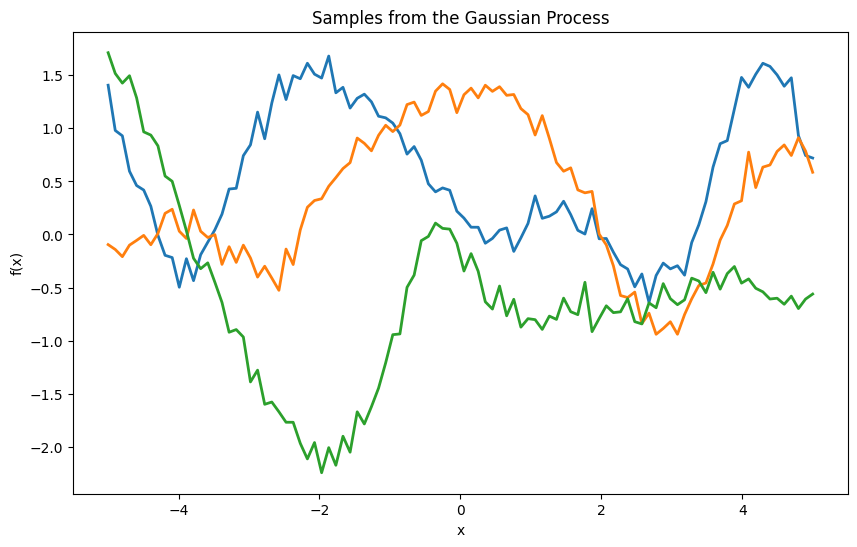

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Define the RBF kernel
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = cdist(x1, x2, 'sqeuclidean')
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Generate sample points
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Compute the covariance matrix
length_scale = 1.0
sigma_f = 1.0
K = rbf_kernel(X, X, length_scale, sigma_f)

# Add observation noise
sigma_y = 0.1
K_noise = K + sigma_y**2 * np.eye(len(X))

# Number of samples to draw
num_samples = 3

# Step-by-step sampling process using Cholesky decomposition

# Mean vector (zeros)
mean = np.zeros(len(X))

# Cholesky decomposition of the covariance matrix
L = np.linalg.cholesky(K_noise)

# Draw samples from standard normal distribution
z = np.random.normal(size=(num_samples, len(X)))

# Transform to the desired distribution
samples = mean + z @ L.T

# Plot the samples
plt.figure(figsize=(10, 6))
plt.plot(X, samples.T, lw=2)
plt.title('Samples from the Gaussian Process')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


### Generate process using quantile based distance

The use of the quantile-based distance function in the computation of the covariance matrix has a notable impact on the Gaussian Process (GP) modeling and the generation of samples. 

**Effect on Covariance Matrix**

The covariance matrix (or kernel matrix) in Gaussian Processes defines how the observations are related to each other. The choice of distance metric in the kernel function affects this covariance structure. 

#### **Traditional RBF Kernel:**
For a traditional Radial Basis Function (RBF) kernel, the covariance between two points $x_i$ and $x_j$ is computed as:

$$
K(x_i, x_j) = \sigma_f^2 \exp\left(-\frac{\|x_i - x_j\|^2}{2 l^2}\right)
$$

where $\|x_i - x_j\|^2$ is the squared Euclidean distance between $x_i$ and $x_j$, $ \sigma_f $ is the signal variance, and $ l $ is the length scale.

#### **Quantile-Based Distance:**
When you replace the squared Euclidean distance with a quantile-based distance (as derived from the quantile loss function), the covariance matrix becomes:

$$
K_{ij} = \sigma_f^2 \exp\left(-\frac{ \text{quantile\_loss}(x_i, x_j)^2}{2 l^2}\right)
$$

where:

$$
\text{quantile\_loss}(x_i, x_j) = \text{max}\left((\tau - 1) \cdot (x_i - x_j), \tau \cdot (x_j - x_i)\right)
$$

#### **Impact of Quantile-Based Distance:**

**Sensitivity to Outliers**:
   - **Traditional RBF**: The RBF kernel smooths distances based on the squared Euclidean distance, which can be sensitive to outliers or large deviations.
   - **Quantile-Based Distance**: By focusing on the quantile of errors, the kernel can handle deviations differently, potentially reducing sensitivity to outliers or extreme values depending on the chosen quantile.

**Distance Sensitivity**:
   - **Traditional RBF**: Distance is computed in a straightforward manner; points that are far apart will have exponentially decreasing covariance.
   - **Quantile-Based Distance**: The distance is influenced by the quantile-specific loss, which may lead to non-standard distances that reflect the prediction error more robustly. For different quantile values, the distance metric becomes sensitive to different aspects of prediction errors.

**Covariance Structure**:
   - **Traditional RBF**: The covariance matrix is typically smooth and positive definite.
   - **Quantile-Based Distance**: The covariance matrix might exhibit different structure, particularly with varying quantiles. For higher quantile values, the covariance might become more concentrated, emphasizing large deviations more.

**Effect on Sample Generation**

When using the quantile-based distance in the covariance matrix, the generated samples from the GP will reflect the altered covariance structure. This affects the generated functions' appearance and behavior.

#### **Sample Generation with Traditional RBF Kernel:**

- **Smoothness**: Functions are generally smooth due to the exponential decay of covariance with distance.
- **Variability**: Functions will vary smoothly according to the chosen length scale and signal variance.

**Higher Quantile Values**:If the quantile is higher (e.g., 0.9), the distance emphasizes positive errors (giving more weight to positive errors).

C:\Users\Dr\AppData\Local\Temp\ipykernel_13692\3341258912.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i,j]=4*loss**2
C:\Users\Dr\AppData\Local\Temp\ipykernel_13692\3341258912.py:38: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples3 = np.random.multivariate_normal(np.zeros(len(X)), K_noise, num_samples)


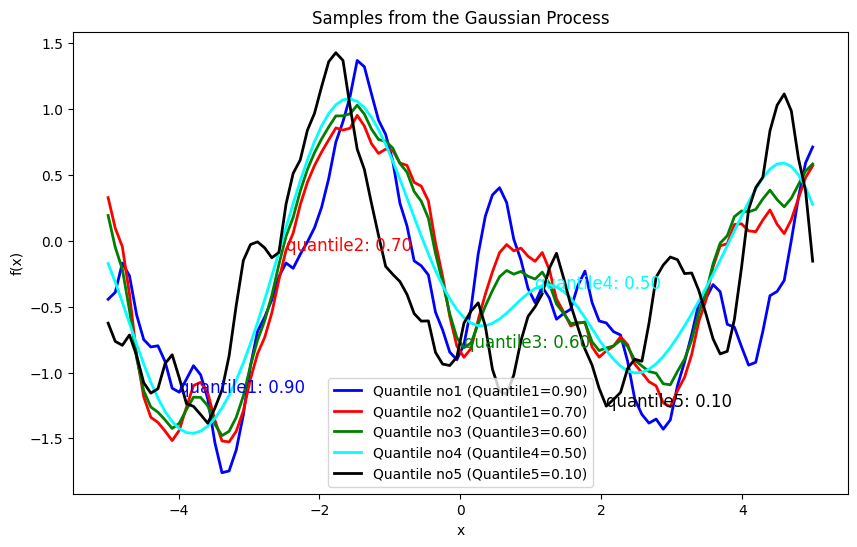

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def quantile_loss(preds, target, quantile):
    #quantile_losses = []
    assert 0 < quantile < 1, "Quantile should be in (0, 1) range"
    n1 = len(preds)
    n2 = len(target)
    K = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            errors = target[i] - preds[j]
            loss = np.maximum((quantile - 1) * errors, quantile * errors)
            K[i,j]=4*loss**2
            #quantile_losses.append(loss)
    return (K)
    
# Define the RBF kernel
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0, quantile=0.5):
    sqdist = quantile_loss(x1, x2, quantile)
    
    #sqdist = cdist(x1, x2, 'sqeuclidean')
    
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

def GenSamples(X, length_scale, sigma_f, quantile3):
    K = rbf_kernel(X, X, length_scale, sigma_f, quantile3)
    # Add observation noise
    sigma_y = 0.01
    K_noise = K #+ sigma_y**2 * np.eye(len(X))
    # Draw samples from the GP
    # Set a seed for reproducibility
    np.random.seed(42)
    num_samples = 1
    samples3 = np.random.multivariate_normal(np.zeros(len(X)), K_noise, num_samples)
    return samples3

# Generate sample points
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Compute the covariance matrix
length_scale = 1
sigma_f = 1

quantile1 =0.9
samples1 =GenSamples(X, length_scale, sigma_f, quantile1)

quantile2 =0.7
samples2 =GenSamples(X, length_scale, sigma_f, quantile2)

quantile3 =0.6
samples3 =GenSamples(X, length_scale, sigma_f, quantile3)

quantile4 =0.5
samples4 =GenSamples(X, length_scale, sigma_f, quantile4)

quantile5 =0.1
samples5 =GenSamples(X, length_scale, sigma_f, quantile5)

# Plot the samples
plt.figure(figsize=(10, 6))

plt.plot(X, samples1.reshape(-1,1), lw=2, color='blue', label=f'Quantile no1 (Quantile1={quantile1:.2f})')
plt.text(X[10], samples1.reshape(-1,1)[10], f'quantile1: {quantile1:.2f}', fontsize=12, color='blue')

plt.plot(X, samples2.reshape(-1,1), lw=2, color='red', label=f'Quantile no2 (Quantile1={quantile2:.2f})')
plt.text(X[25], samples2.reshape(-1,1)[25], f'quantile2: {quantile2:.2f}', fontsize=12, color='red')

plt.plot(X, samples3.reshape(-1,1), lw=2, color='green', label=f'Quantile no3 (Quantile3={quantile3:.2f})')
plt.text(X[50], samples3.reshape(-1,1)[50], f'quantile3: {quantile3:.2f}', fontsize=12, color='green')

plt.plot(X, samples4.reshape(-1,1), lw=2, color='cyan', label=f'Quantile no4 (Quantile4={quantile4:.2f})')
plt.text(X[60], samples4.reshape(-1,1)[60], f'quantile4: {quantile4:.2f}', fontsize=12, color='cyan')

plt.plot(X, samples5.reshape(-1,1), lw=2, color='black', label=f'Quantile no5 (Quantile5={quantile5:.2f})')
plt.text(X[70], samples5.reshape(-1,1)[70], f'quantile5: {quantile5:.2f}', fontsize=12, color='black')

plt.legend()



plt.title('Samples from the Gaussian Process')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


### Explanation of $\epsilon$-Insensitive Loss for Process Generation

The $\epsilon$-insensitive loss is used to define a distance measure that only considers errors (or deviations) larger than a specified threshold $\epsilon$. This method is particularly useful in support vector regression (SVR) and can also be adapted to Gaussian processes to model functions that tolerate small deviations without penalty.
The $\epsilon$-insensitive loss function is defined as:

$$
L_{\epsilon}(y_i, y_j) = \max(0, |y_i - y_j| - \epsilon)
$$

where $\epsilon > 0$ is a hyperparameter that defines the insensitivity range. If the absolute difference $|y_i - y_j|$ is less than $\epsilon$, the loss is zero; otherwise, it is the amount by which the difference exceeds $\epsilon$.

**Formulate the Distance Metric:**
Square the $\epsilon$-insensitive loss to form a distance metric:

$$
d_{\epsilon}(x_i, x_j) = 4 \cdot \left(\max(0, |y_i - y_j| - \epsilon)\right)^2
$$
This distance metric will be used in place of the standard Euclidean distance in the RBF kernel.

**Compute the Covariance Matrix:**
   Using the distance metric, compute the covariance matrix with the RBF kernel:

$$
K_{ij} = \sigma_f^2 \exp\left(-\frac{d_{\epsilon}(x_i, x_j)}{2 l^2}\right)
$$

where $\sigma_f$ is the signal variance, and $l$ is the length scale.

### Impact on Process Generation
**Effect of $\epsilon$ Value:**
   - **Small $\epsilon$:** When $\epsilon$ is small, the loss function is more sensitive to small deviations. The resulting distance metric $d_{\epsilon}(x_i, x_j)$ will be larger for small differences. 

   - **Large $\epsilon$:** When $\epsilon$ is large, small deviations are ignored, and only larger differences contribute to the distance metric. 

**Sample Characteristics:**
   - **Smoothness:** Smaller $\epsilon$ values lead to smoother samples since the covariance between nearby points is higher.

<>:68: SyntaxWarning: invalid escape sequence '\e'
<>:68: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Dr\AppData\Local\Temp\ipykernel_13692\3299196453.py:68: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Samples from the Gaussian Process with $\epsilon$-Insensitive Loss')
C:\Users\Dr\AppData\Local\Temp\ipykernel_13692\3299196453.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = 4 * loss**2
C:\Users\Dr\AppData\Local\Temp\ipykernel_13692\3299196453.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(np.zeros(len(X)), K_noise, num_samples)


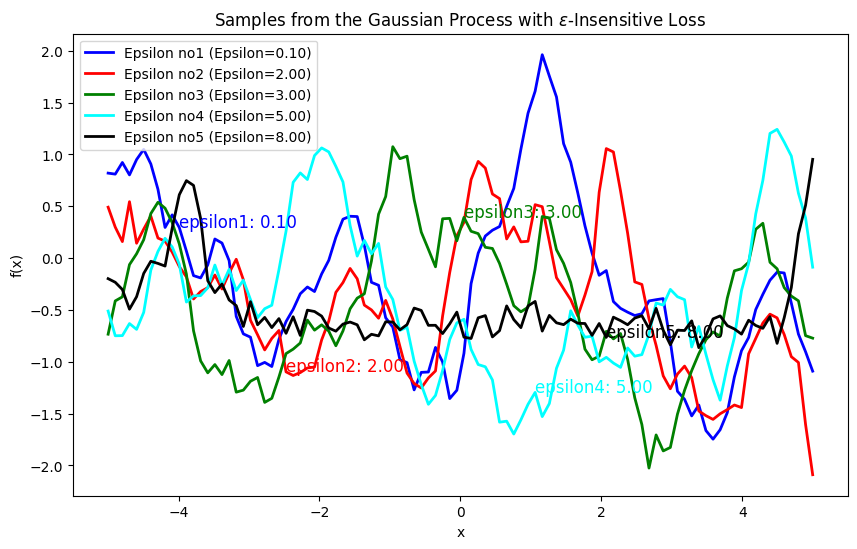

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def epsilon_loss(preds, target, epsilon=0.1):
    n1 = len(preds)
    n2 = len(target)
    K = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            errors = np.abs(target[i] - preds[j])
            loss = np.maximum(0, errors - epsilon)
            K[i, j] = 4 * loss**2
    return K

def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0, epsilon=0.1):
    sqdist = epsilon_loss(x1, x2, epsilon)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

def GenSamples(X, length_scale, sigma_f, epsilon):
    K = rbf_kernel(X, X, length_scale, sigma_f, epsilon)
    sigma_y = 0.1
    K_noise = K + sigma_y**2 * np.eye(len(X))
    np.random.seed(42)
    num_samples = 1
    samples = np.random.multivariate_normal(np.zeros(len(X)), K_noise, num_samples)
    return samples

X = np.linspace(-5, 5, 100).reshape(-1, 1)

length_scale = 1
sigma_f = 1

epsilon1 = 0.1
samples1 = GenSamples(X, length_scale, sigma_f, epsilon1)

epsilon2 = 2.0
samples2 = GenSamples(X, length_scale, sigma_f, epsilon2)

epsilon3 = 3.0
samples3 = GenSamples(X, length_scale, sigma_f, epsilon3)

epsilon4 = 5.0
samples4 = GenSamples(X, length_scale, sigma_f, epsilon4)

epsilon5 = 8.0
samples5 = GenSamples(X, length_scale, sigma_f, epsilon5)

plt.figure(figsize=(10, 6))

plt.plot(X, samples1.reshape(-1,1), lw=2, color='blue', label=f'Epsilon no1 (Epsilon={epsilon1:.2f})')
plt.text(X[10], samples1.reshape(-1,1)[10], f'epsilon1: {epsilon1:.2f}', fontsize=12, color='blue')

plt.plot(X, samples2.reshape(-1,1), lw=2, color='red', label=f'Epsilon no2 (Epsilon={epsilon2:.2f})')
plt.text(X[25], samples2.reshape(-1,1)[25], f'epsilon2: {epsilon2:.2f}', fontsize=12, color='red')

plt.plot(X, samples3.reshape(-1,1), lw=2, color='green', label=f'Epsilon no3 (Epsilon={epsilon3:.2f})')
plt.text(X[50], samples3.reshape(-1,1)[50], f'epsilon3: {epsilon3:.2f}', fontsize=12, color='green')

plt.plot(X, samples4.reshape(-1,1), lw=2, color='cyan', label=f'Epsilon no4 (Epsilon={epsilon4:.2f})')
plt.text(X[60], samples4.reshape(-1,1)[60], f'epsilon4: {epsilon4:.2f}', fontsize=12, color='cyan')

plt.plot(X, samples5.reshape(-1,1), lw=2, color='black', label=f'Epsilon no5 (Epsilon={epsilon5:.2f})')
plt.text(X[70], samples5.reshape(-1,1)[70], f'epsilon5: {epsilon5:.2f}', fontsize=12, color='black')

plt.legend()
plt.title('Samples from the Gaussian Process with $\epsilon$-Insensitive Loss')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


### Mini Project: Exploring Smoothness and Loss Functions in Gaussian Process Generation

#### Objectives:
1. Investigate how different loss functions impact the smoothness and variability of Gaussian Process (GP) generated samples.
2. Compare standard distance metrics like squared Euclidean distance with advanced loss functions such as quantile loss and \(\epsilon\)-insensitive loss.
3. Visualize and analyze the generated processes for different loss functions and parameter settings.
4. Analyze the impact of each loss function on the smoothness and variability of the generated processes.